In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider
import scipy.signal as sig
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['figure.subplot.hspace'] = 0.4

# Aufgabe 2: Faltung und Transformationstheoreme

Die Impulsantwort eines LTI-Systems lautet:
\begin{align}
    h(t) = \mathrm{rect}\left(\frac{t}{T}\right), \quad T > 0.
\end{align}

#### Graphische Darstellung der Impulsantwort

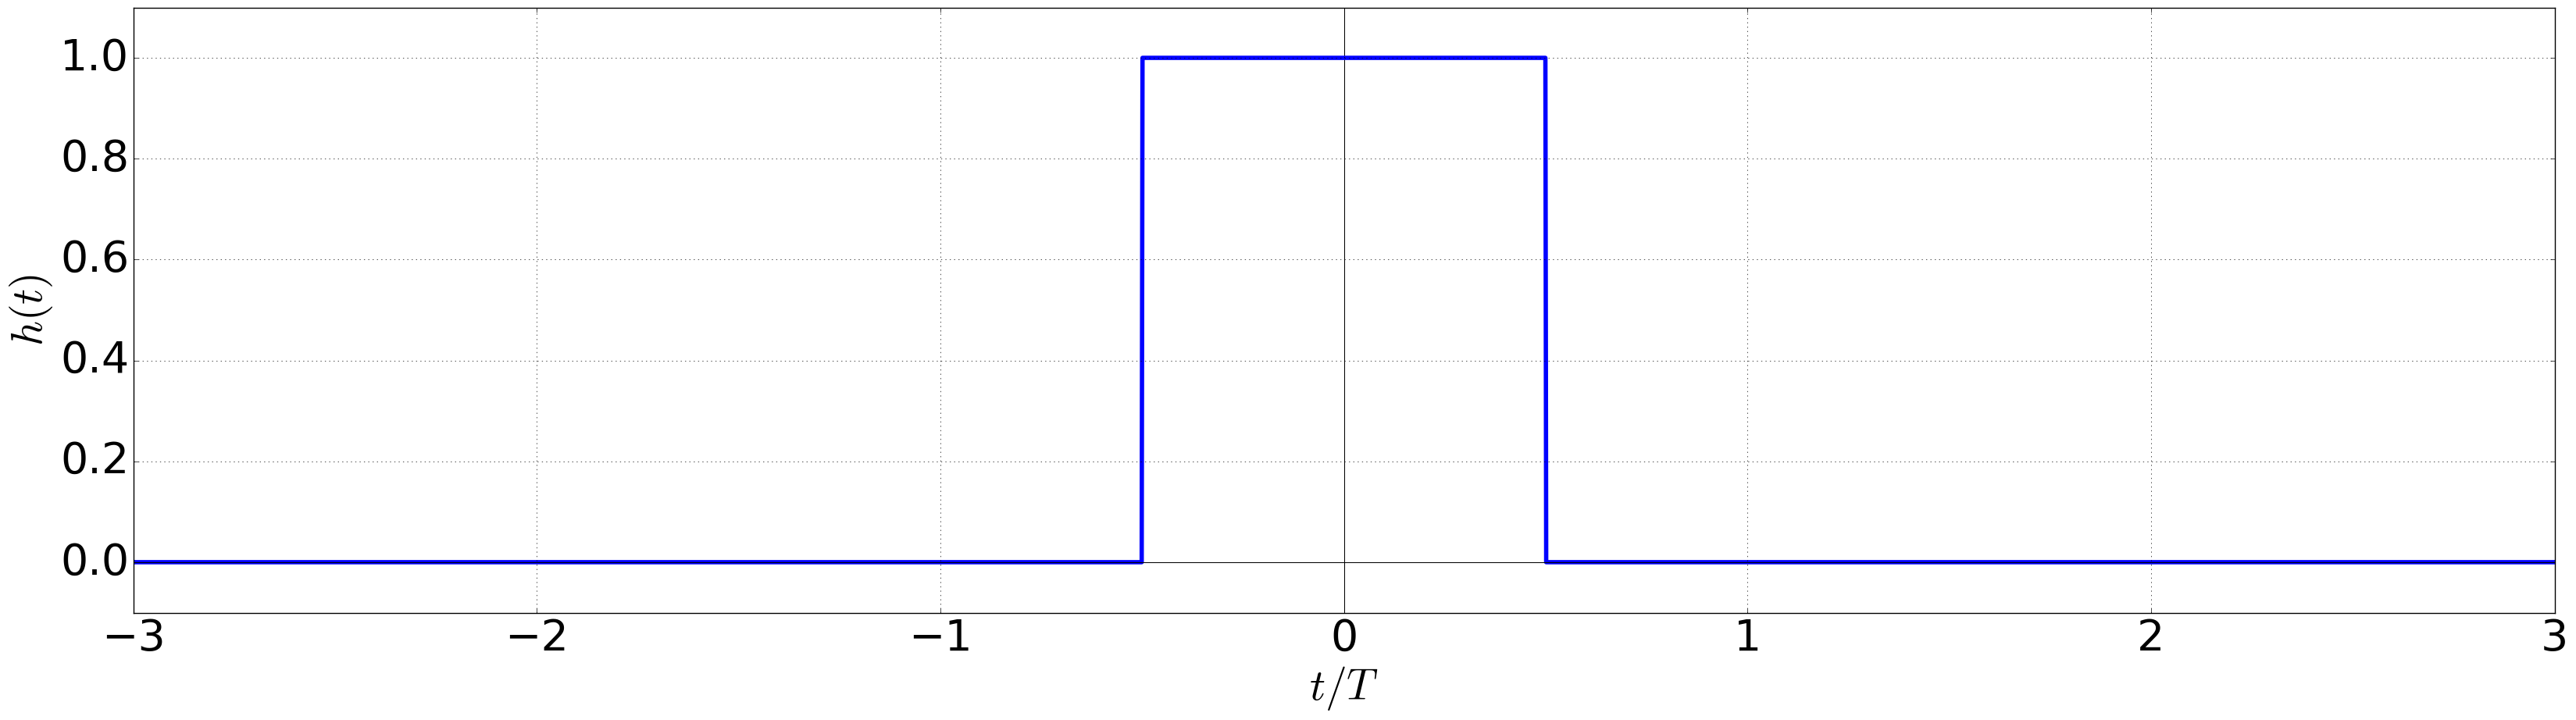

In [2]:
N = 3*1000
T = 1
T_d = 6*T
samples_per_unit = N/T_d
delta_t = 1/samples_per_unit

t = np.linspace(-T_d/2, T_d/2, N)

h = 1.0*(np.abs(t) <= T/2)

plt.axvline(linewidth=0.75, color='k')
plt.plot(t/T, h, 'b-', lw=4);
plt.axhline(linewidth=0.75, color='k')
plt.xlabel(r'$t/T$')
plt.ylabel(r'$h(t)$')
plt.xlim((-3, 3))
plt.ylim((-0.1, 1.1))
plt.grid(True)

## 2.1
Ist das System kausal?

Für ein kausales LTI-System muss gelten:

\begin{align}
    h(t) = 0 \quad \forall t < 0
\end{align}

Das System ist **nicht kausal**, da $h(t) =1 \neq 0$ auch für $t \in [-T/2, 0]$ gilt.

#### Begründung:
Kausalität heißt, dass die Wirkung der Ursache folgen muss.

Die Impulsantwort ist das Ausgangssignal des Systems, wenn am Eingang ein Dirac-Impuls angelegt wird. Der Dirac-Impuls hat nur einen Wert für $t=0$. Wenn die Impulsantwort also Werte für $t<0$ aufweist, gibt es schon einen Ausgangswert, **bevor** das Eingangssignal anliegt. Die Wirkung tritt also zeitlich vor der zugrungdeliegenden Ursache auf, was der Kausalität widerspricht.

Da das LTI-System vollständig durch die Impulsantwort beschrieben wird, ist diese Argumentation für beliebige Eingangssignale gültig.

## 2.2
Bestimmen **und** skizzieren Sie die Antwort $y_1(t)$ des Systems auf das Eingangssignal $x_1(t) = \mathrm{rect}\left(\frac{t}{T}\right)$.

\begin{align}
        y_1(t) &= x_1(t) \ast h(t) \\
    &= \mathrm{rect}\left( \frac{t}{T} \right) \ast \mathrm{rect}\left( \frac{t}{T} \right)
    \end{align}
#### Faltungssatz:
\begin{align}
    \mathcal{F}\left\{ x_1(t) \ast x_2(t) \right\} = X_1(j\omega) \cdot X_2(j\omega)
    \end{align}
#### Ähnlichkeitssatz:
\begin{align}
    \mathcal{F}\left\{x(at) \right\} &= \frac{1}{|a|} X \left(j\frac{\omega}{a} \right) \\
    \Rightarrow \mathcal{F}\left\{ \mathrm{rect}\left(\frac{t}{T}\right) \right \} &= T \mathrm{si}\left( \frac{\omega T}{2} \right)
\end{align}
#### a) Lösung im Frequenzbereich:
\begin{align}
    Y_1(j\omega) &= X_1(j\omega) \cdot H(j\omega) \\
    &= \left( T \mathrm{si}\left( \frac{\omega T}{2} \right) \right) \cdot \left( T \mathrm{si}\left( \frac{\omega T}{2} \right) \right) \\
    &= T \cdot T\mathrm{si}^2\left( \frac{\omega T}{2} \right) \\
    \Rightarrow y_1(t) &= T \cdot \mathcal{F}^{-1}\left\{ T\mathrm{si}^2\left( \frac{\omega T}{2} \right) \right\} \\
    &= T \Lambda \left(\frac{t}{T}\right)
\end{align}
#### b) (graphische Lösung)

#### Graphische Darstellung von $y_1(t)$

Hier wird $y_1(t) = x_1(t) \ast h(t) = \int_{-\infty}^{\infty} x_1(\tau) h(t - \tau) \mathrm{d} \tau$ berechnet und gezeichnet.

Das berechnete Integral ist die Fläche unter dem Produkt von $x_1(\tau)$ und $h(-(\tau-t))$ für das **aktuelle** t. Es ist  im oberen Plot rot eingefärbt sowie im unteren Plot als rote Linie im gesamten Ausgangssignal gekennzeichnet. Der Schieber für **shift** stellt dazu die aktuelle Zeit $t$ ein.

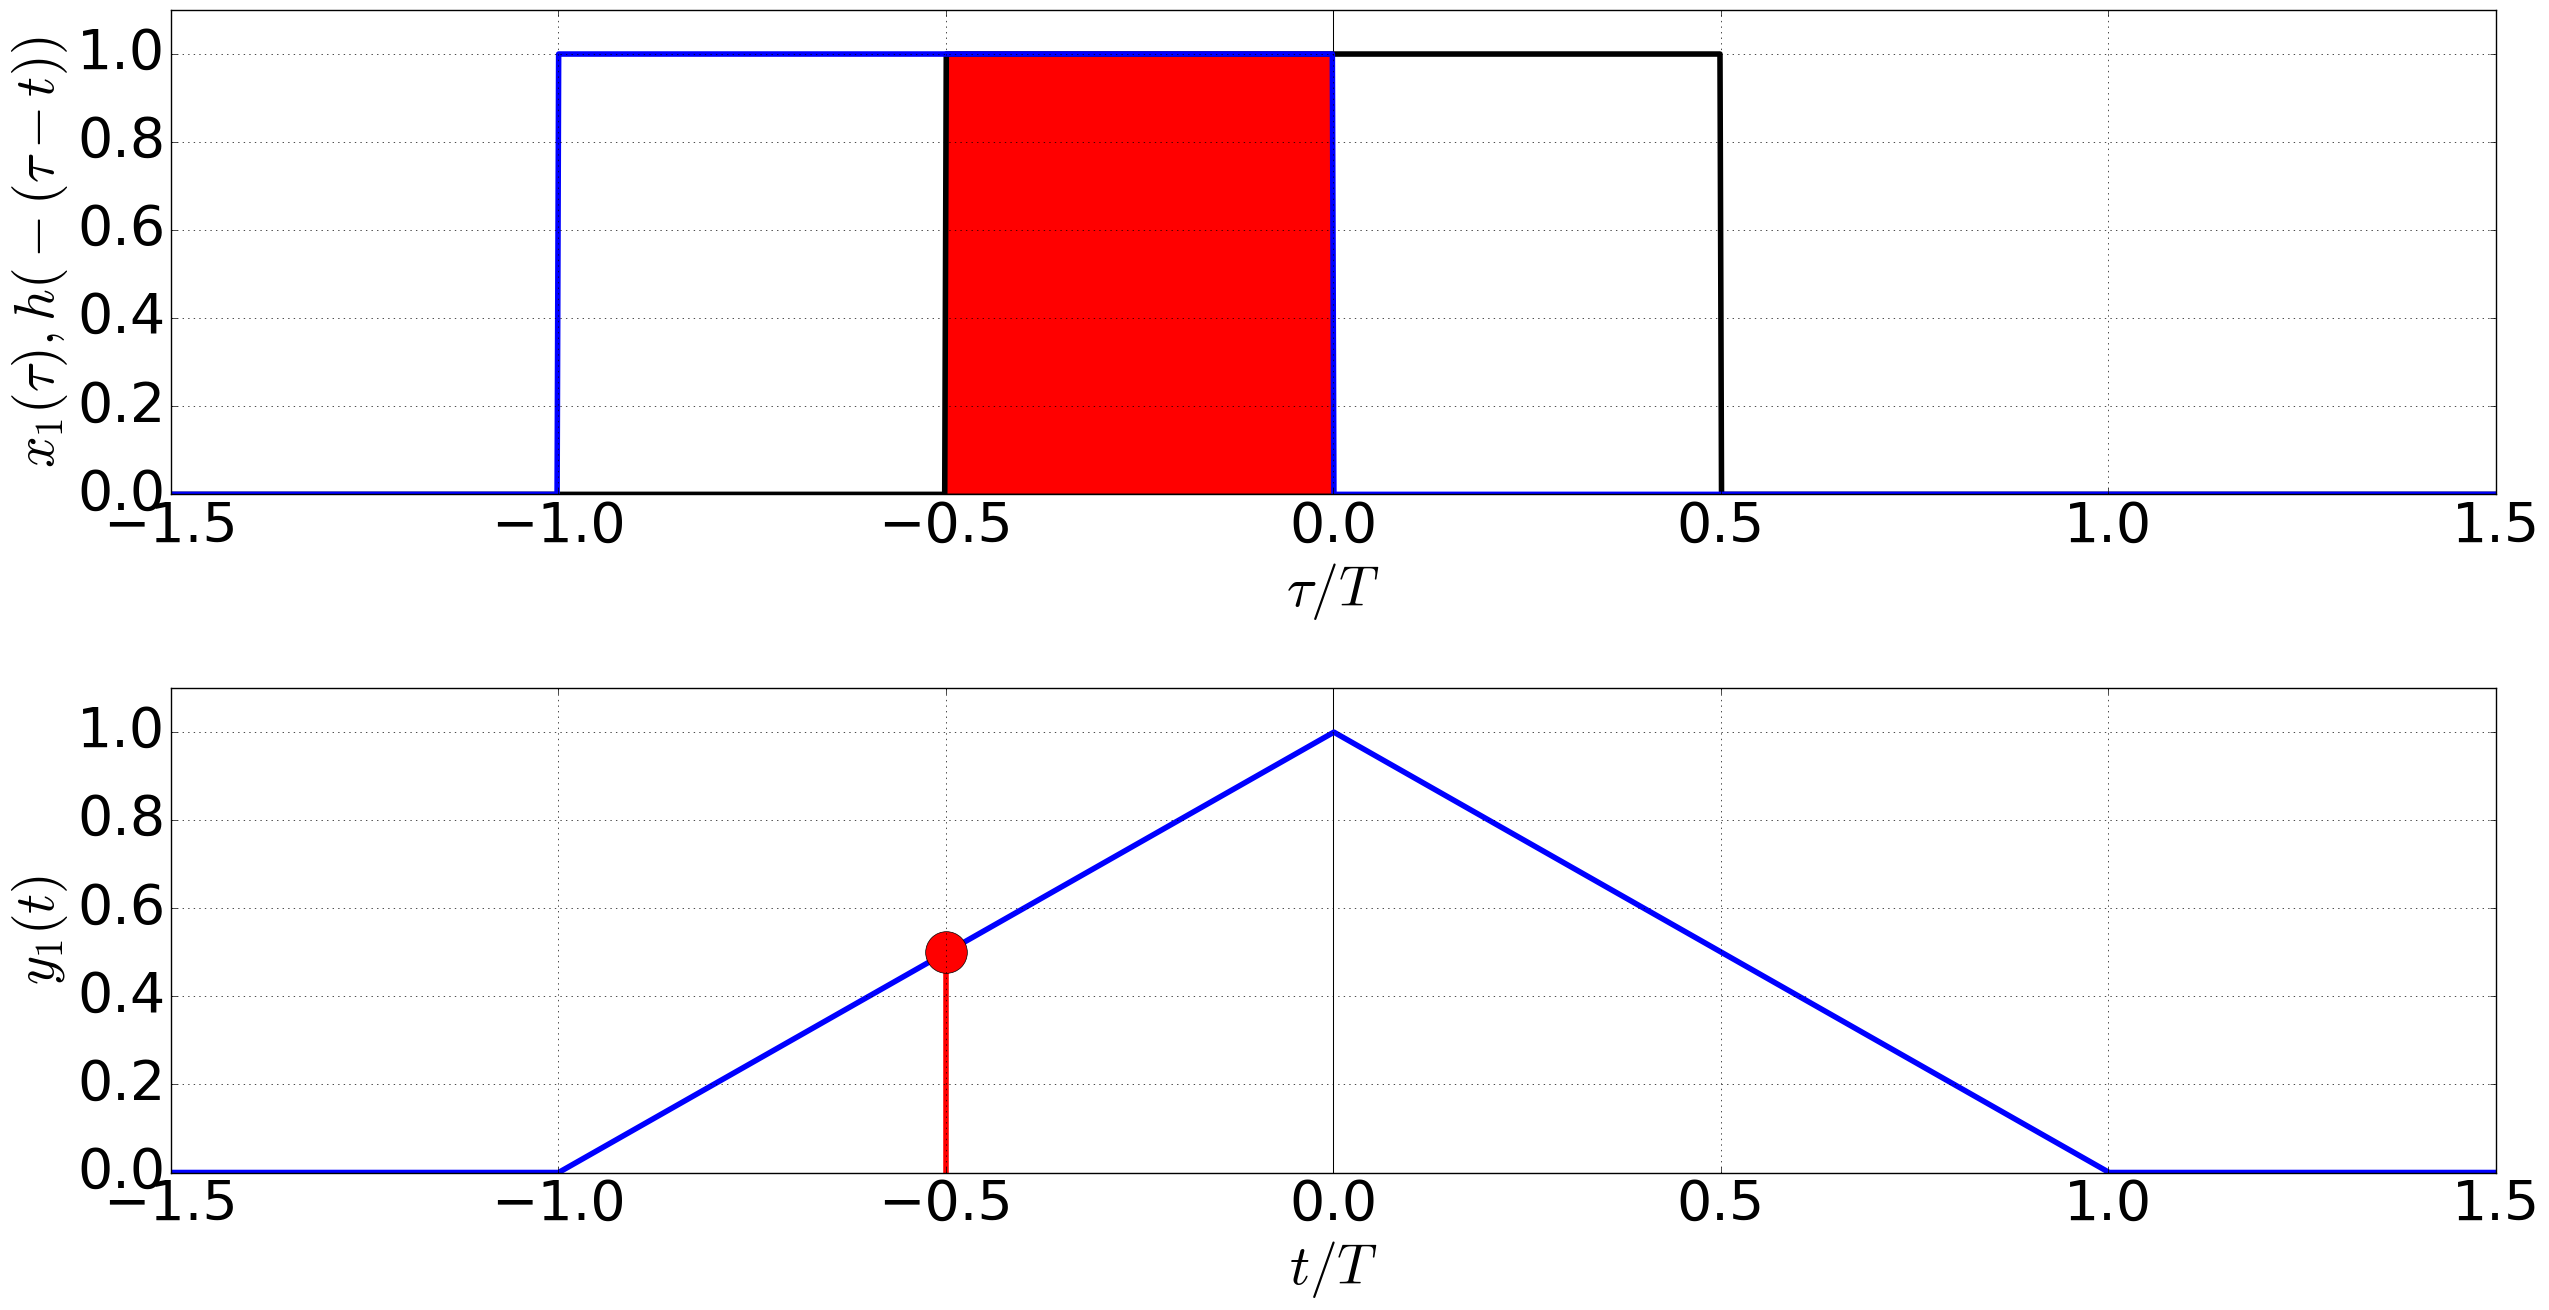

In [3]:
# Beispiel aus der Uebung
x1 = h.copy()
h_local = h.copy()

# Oder:
# Sinusschwingung
#omega_s = 2*pi*(1/(T/8))
#x1 = np.sin(omega_s*t);
# Tiefpass erster Ordnung (RC-Glied)
#tau = T_d/10
#h_local = (t >= 0)*1/tau*np.exp(-t/tau)

# get y_2(t)
y1 = sig.convolve(h_local, x1, 'same')*delta_t

zeroFunc = np.zeros(h.shape)

ax1_ylower = min(min(h_local), min(x1))
ax1_yupper = max(max(h_local), max(x1))

ax2_ylower = min(y1[np.abs(t) <= 1.5*T])
ax2_yupper = max(y1[np.abs(t) <= 1.5*T])


@interact(shift=FloatSlider(min = -T, max = T, step = 0.1, value = -0.5))
def LTI_convolution(shift):
    
    shift_in_samples = int(shift * samples_per_unit)    
    h_t_minus_tau = np.roll(np.flipud(h_local), shift_in_samples)
    integrand = x1*h_t_minus_tau
    # Berechnet das Faltungsintegral fuer ein bestimmtes t
    y1_current_value = np.trapz(integrand)*delta_t


    fig1 = plt.figure();
    fig1.set_size_inches(30, 15)
    # Erster Plot: 
    # Fläche unter dem Produkt    
    ax1 = fig1.add_subplot(2, 1, 1,
        xlim = (-1.5*T, 1.5*T),
        ylim = (1.1*ax1_ylower, 1.1*ax1_yupper),
        xlabel = r'$\tau/T$',
        ylabel = r'$x_1(\tau), h(-(\tau-t))$')
    ax1.grid(True)
    
    ax1.axvline(lw=0.75, c='k')
    # Eingangssignal
    ax1.plot(t/T, x1, color = 'k', lw=4)
    # Impulsantwort
    ax1.plot(t/T, h_t_minus_tau, color='b', lw=4)
    # Fläche unter dem Produkt der beiden
    ax1.fill_between(t/T, 0, integrand, facecolor='r')
    ax1.axhline(lw=0.75, c='k')
    
    # Zweiter Plot
    ax2 = fig1.add_subplot(2, 1, 2,
        xlim = (-1.5*T, 1.5*T),
        ylim = (1.1*ax2_ylower, 1.1*ax2_yupper),
        xlabel = r'$t/T$',
        ylabel = r'$y_1(t)$')
    ax2.grid(True)
    ax2.axvline(lw=0.75, c='k')
    
    # Ausgangssignal
    ax2.plot(t/T, y1, 'b-', lw=4)
    
    # Anzeige des aktuellen Wertes
    ax2.plot([shift], [y1_current_value], 'ro-', ms=30)
    ax2.vlines(shift, 0, y1_current_value, 'r', lw=4)
    ax2.axhline(lw=0.75, c='k')

## 2.3
Bestimmen **und** skizzieren sie die Antwort $y_2(t)$ des Systems auf das Eingangssignal $x_2(t) = \mathrm{rect}\left(\frac{2 t}{T} - \frac{3}{2}\right)$.

#### Umschreiben des Signals:
\begin{align}
    x_2(t) &= \mathrm{rect} \left( \frac{2 t}{T} - \frac{3}{2} \right) \\
    &= \mathrm{rect} \left( \frac{ 2 t - 3T/2}{T} \right) \\
    &= \mathrm{rect} \left( \frac{ t - 3T/4}{T/2} \right) \\
    &= \underbrace{ \mathrm{rect} \left( \frac{t}{T/2} \right)}_{:= \tilde{x}_2(t)} \ast \delta \left(t - 3T/4\right)
\end{align}

#### Faltung mit unverschobenen Signalen:
\begin{align}
    y_2(t) &= \tilde{x}_2(t) \ast h(t) \ast \delta \left( t - 3T/4 \right) \\
            &= \tilde{y}_2(t) \hspace{2.2em} \ast \delta \left( t - 3T/4 \right) \\[1.5em]
    \Rightarrow \tilde{y}_2(t) &= \tilde{x}_2(t) \ast h(t) = \mathrm{rect}\left( \frac{t}{T/2} \right) \ast \mathrm{rect}\left( \frac{t}{T} \right)
\end{align}

#### a) Lösung mit Zerlegung:
\begin{align}
    \mathrm{rect}\left( \frac{t}{T} \right) &= \mathrm{rect}\left( \frac{t-t/4}{T/2} \right) + \mathrm{rect}\left( \frac{t+T/4}{T/2} \right) \\
    &= \mathrm{rect}\left( \frac{t}{T/2} \right) \ast \left( \delta\left(t - T/4\right) + \delta\left(t + T/4\right)  \right) \\[1em]
    \Rightarrow \tilde{y}_2(t) &= \mathrm{rect}\left( \frac{t}{T/2} \right) \ast \mathrm{rect}\left( \frac{t}{T/2} \right) \ast \left( \delta\left(t - T/4\right) + \delta\left(t + T/4\right) \right) \\
    &\underset{\text{äquiv. zu 2.1)}}{=} \frac{T}{2} \left( \Lambda\left(\frac{t-T/4}{T/2}\right) + \Lambda\left(\frac{t+T/4}{T/2}\right) \right) \\[1em]
    \Rightarrow y_2(t) &= \tilde{y}_2(t) \ast \delta(t - 3T/4) = \frac{T}{2} \left( \Lambda\left(\frac{t-T}{T/2}\right) + \Lambda\left(\frac{t-T/2}{T/2}\right) \right)
\end{align}

#### Graphische Darstellung von $y_2(t)$:

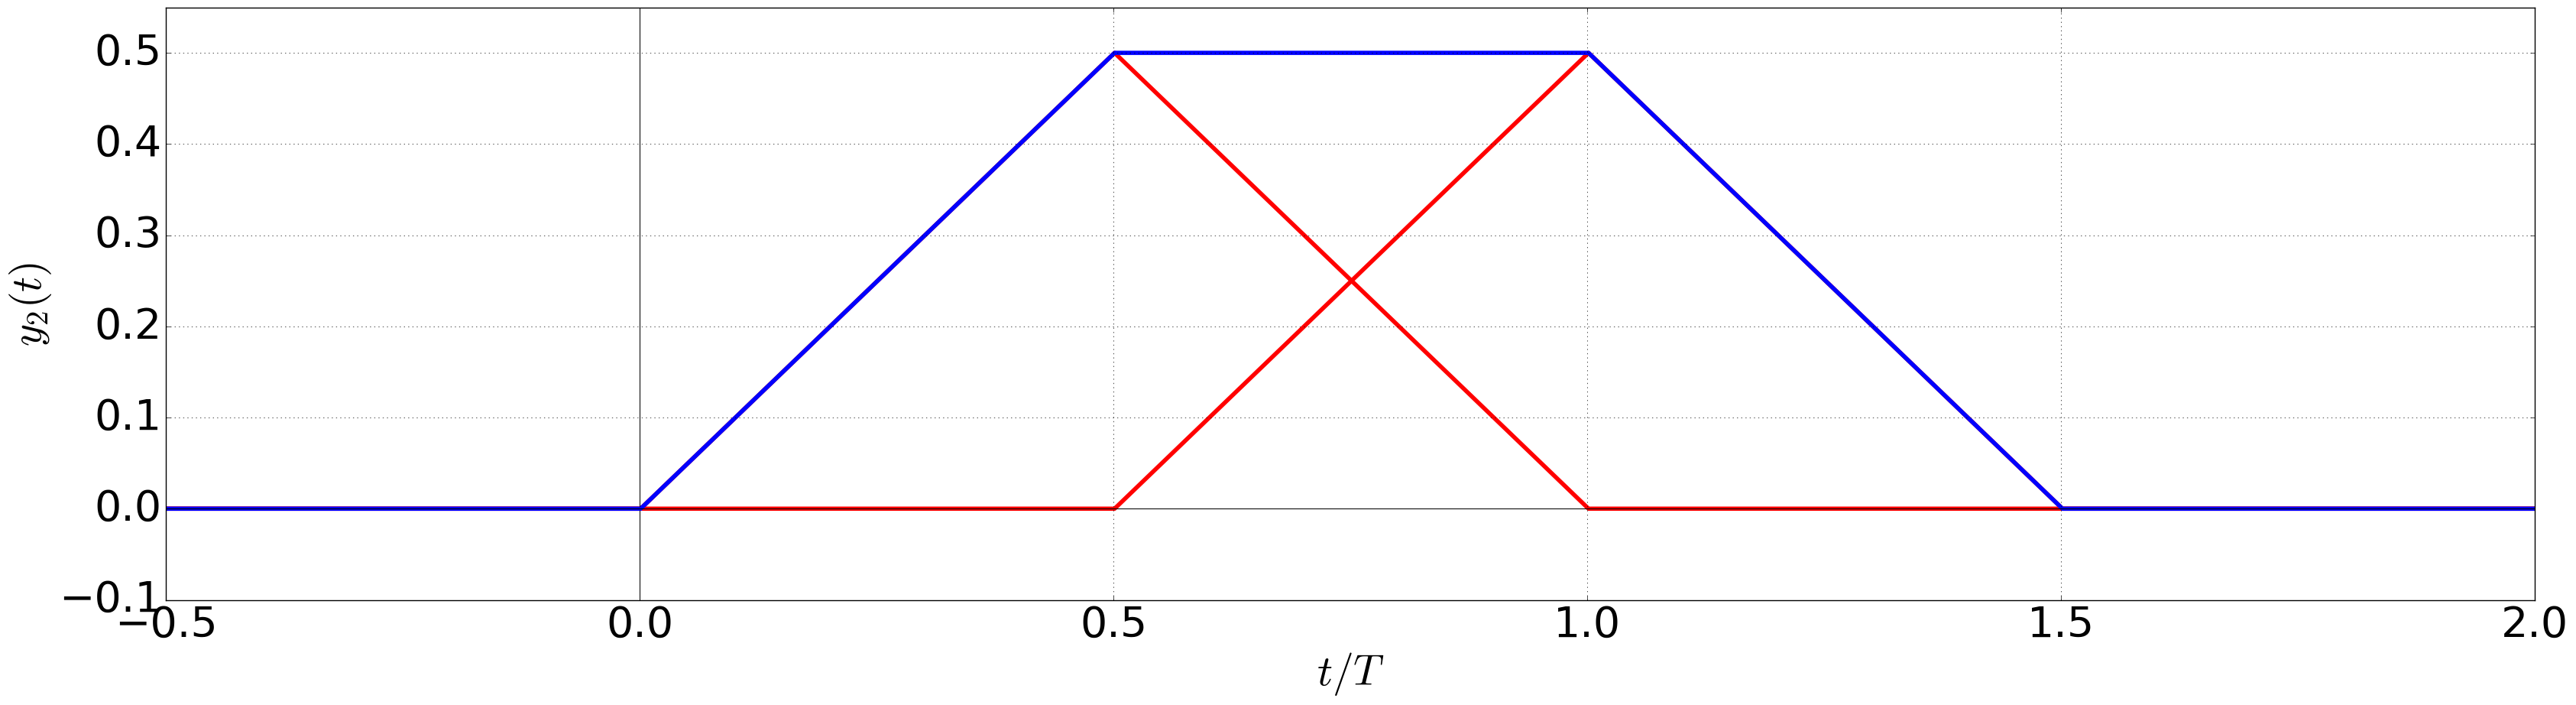

In [4]:
r = 1.0*(np.abs(t) <= T/4)
tri = sig.convolve(r, r, 'same')*delta_t

u1 = np.roll(tri, int(T/2/delta_t))
u2 = np.roll(tri, int(T/delta_t))

plt.axvline(lw=0.75, c='k')
plt.plot(t/T, u1, 'r', lw=4)
plt.plot(t/T, u2, 'r', lw=4)
plt.plot(t/T, u1 + u2, 'b', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$t/T$')
plt.ylabel(r'$y_2(t)$')
plt.xlim((-T/2, 2*T))
plt.ylim((-0.1, 1.1*max(u1)))
plt.grid(True);

#### b) Teilweises Lösen im Frequenzbereich:

\begin{align}
    \tilde{Y}_2(j\omega) = \mathcal{F}\left\{ \tilde{y}_2(t) \right\} &= \mathcal{F} \left\{ \mathrm{rect}\left( \frac{t}{T/2} \right) \ast \mathrm{rect}\left( \frac{t}{T} \right) \right\} \\
    &= \mathcal{F}\left \{ \mathrm{rect}\left( \frac{t}{T/2} \right) \right\} \cdot \mathcal{F}\left \{ \mathrm{rect}\left( \frac{t}{T} \right) \right\} \\
        &= T \mathrm{si} \left( \frac{\omega T}{2} \right) \cdot \frac{T}{2} \mathrm{si} \left( \frac{\omega T}{4} \right) \\
\end{align}

Hilfsrechnung:

\begin{align}
    \mathrm{si}\left( \frac{\omega T}{2} \right) = \frac{ \mathrm{e}^{j \omega \frac{T}{2}} - \mathrm{e}^{-j \omega \frac{T}{2}} }{2j \frac{\omega T}{2} }
    \underset{\text{3. Bin. Formel}}{=} \frac{ \mathrm{e}^{j \omega \frac{T}{4}} - \mathrm{e}^{-j \omega \frac{T}{4}} }{2j \frac{\omega T}{4} } \cdot \frac{ \mathrm{e}^{j \omega \frac{T}{4}} + \mathrm{e}^{-j \omega \frac{T}{4}} }{2} \quad 
    \left( = \mathrm{si}\left( \frac{\omega T}{2} \right) \cos \left( \frac{\omega T}{4} \right) \right)
\end{align}

#### Damit folgt:

\begin{align}
    \tilde{Y}_2(j\omega) &= \left(\frac{T}{2}\right)^2 \mathrm{si}^2 \left( \frac{\omega T}{4} \right) \cdot \left( \mathrm{e}^{-j \omega \frac{T}{4}} + \mathrm{e}^{j \omega \frac{T}{4}} \right)
\end{align}

#### Rückkehr in den Zeitbereich durch den Faltungssatz:

\begin{align}
    \Rightarrow \tilde{y}_2(t) = \mathcal{F}^{-1} \left \{ \tilde{Y}_2(t) \right \} &= \frac{T}{2}\cdot \Lambda\left(\frac{t}{T/2}\right) \ast \left(\delta(t-T/4) + \delta(t+t/4) \right) \\
        &= \frac{T}{2} \left( \Lambda\left(\frac{t-T/4}{T/2}\right) + \Lambda\left(\frac{t+T/4}{T/2}\right) \right) \\[1em]
    \Rightarrow y_2(t) = \tilde{y}_2(t) \ast \delta(t - 3T/4) &= \left( \Lambda\left(\frac{t-T}{T/2}\right) + \Lambda\left(\frac{t-T/2}{T/2}\right) \right)    
\end{align}    

## 2.4
Berechnen sie die Fouriertransformierte $Y_1(j\omega)$ des Ausgangssignals $y_1(t)$.

\begin{align}
        Y_1(j\omega) &= \mathcal{F} \left\{y_1(t) \right \} \\
        &= \mathcal{F}\left\{ x_1(t) \ast h(t) \right\} \\
        &= X_1(j\omega) \cdot H(j\omega) \\ 
        \text{(Ähnlichkeitstheorem / 2.1a)} &= T \mathrm{si}\left( \frac{\omega T}{2} \right) \cdot T \mathrm{si}\left( \frac{\omega T}{2} \right)  \\
        &= T^2 \mathrm{si}^2 \left( \frac{\omega T}{2} \right)
\end{align}

oder

\begin{align}
    Y_1(j\omega) &= \mathcal{F} \left\{y_1(t) \right \} \\
    &=  \mathcal{F} \left\{T \Lambda \left(\frac{t}{T} \right) \right \} \\
    \text{(Tabelle und Ähn.-Theorem)} &= T\cdot T \mathrm{si}^2\left( \frac{\omega T}{2} \right)
\end{align}    

## 2.5
Berechnen sie die Fouriertransformierte $Y_2(j\omega)$ des Ausgangssignals $y_2(t)$.

Aus 2.3):

\begin{align}
    Y_2(j\omega) &= \tilde{Y}_2(j\omega) \cdot \mathrm{e}^{-j \omega \frac{3T}{4}} \\
    &= \left(\frac{T}{2}\right)^2 \mathrm{si}^2 \left( \frac{\omega T}{4} \right) \cdot \left( \mathrm{e}^{-j \omega \frac{T}{4}} + \mathrm{e}^{j \omega \frac{T}{4}} \right) \cdot \mathrm{e}^{-j \omega \frac{3T}{4}} \\
&= \left(\frac{T}{2}\right)^2 \mathrm{si}^2 \left( \frac{\omega T}{4} \right) \cdot \left( \mathrm{e}^{-j \omega T} + \mathrm{e}^{-j \omega \frac{T}{2}} \right)
\end{align}

oder:

\begin{align}
    Y_2(j\omega) &= \mathcal{F}^{-1} \left \{ y_2(t) \right \}  \\
    &= \mathcal{F}^{-1} \left \{ \frac{T}{2} \left( \Lambda \left( \frac{t-T}{T/2} \right) + \Lambda \left( \frac{t-T/2}{T/2} \right) \right) \right \} \\
    &= \left( \frac{T}{2} \right)^2 \mathrm{si}^2 \left( \frac{\omega T}{4} \right) \cdot \left( \mathrm{e}^{-j \omega T } + \mathrm{e}^{-j \omega \frac{T}{2} } \right)
\end{align}

## 2.6
Berechnen sie die Fouriertransformierte des Signals $x_3(t) = \mathrm{si}^2 \left(t \right)$. 

#### Dualitätstheorem:

\begin{align}
    \mathcal{F} \left\{ x(t) \right\} = X(j\omega) \qquad \Rightarrow \qquad \mathcal{F} \left\{ \frac{1}{2\pi} X(t) \right\} = x(-j\omega)
\end{align}

#### Damit gilt:

\begin{align}
    \mathcal{F} \left\{ \Lambda(t) \right\} &= \mathrm{si}^2 \left( \frac{\omega}{2} \right) \\
    \Rightarrow \mathcal{F} \left\{ \frac{1}{2 \pi} \mathrm{si}^2 \left( \frac{t}{2} \right) \right\} &= \Lambda(-\omega) = \Lambda(\omega)
\end{align}

#### Der Ähnlichkeitssatz liefert dann:

\begin{align}
    \mathcal{F} \left\{ \mathrm{si}^2 \left( 2 \frac{t}{2} \right) \right\} = \frac{2\pi}{2} \Lambda \left( \frac{\omega}{2} \right) = \pi \Lambda \left( \frac{\omega}{2} \right)
\end{align}

## Zusatz: Wozu dient dieses System?

Um eine Anwendung des Systems zu erkennen, wird eine normierte Variante betrachtet:
\begin{align}
    g(t) =  \frac{1}{T} \mathrm{rect}\left(\frac{t}{T}\right)
\end{align}  
Damit lässt sich die Faltung zur Berechnung des Ausgangssignals folgendermaßen ausschreiben:  
  
\begin{align}
    y(t) = x(t) \ast g(t) &= \frac{1}{T}\int_{-\infty}^{\infty} x(\tau) \, \mathrm{rect}\left(\frac{t-\tau}{T}\right) \mathrm{d}\tau \\
    &= \frac{1}{T}\int_{-\infty}^{\infty} x(\tau) \, \mathrm{rect}\left(-\frac{\tau-t}{T}\right) \mathrm{d}\tau \\
    &= \frac{1}{T}\int_{t-\frac{T}{2}}^{t+\frac{T}{2}} x(\tau) \ \mathrm{d}\tau
\end{align}
Das System berechnet also den arithmetischen Mittelwert des Eingangssignals über die Dauer $T$.
Das nicht normierte System berechnet dementsprechend das Integral über die Dauer $T$.